# Lesson Bayes: Posterior

In [22]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
from scipy import stats

# Posterior Distribution
The coveted distribution that enables *inference*

# The fundamental question
If we have some observe something, what can we infer about the world in general?

Or as statistician would say 

If we have some observed *samples* of the world, have model of how the world works, and a prior belief, what is our updated belief after incorporating our observations? 

This is what a posterior distribution is

# Calculating a posterior for our A/B Test 
Remember, to calculate a posterior we need
* Prior(s)
* Data
* Likelihood

Let's review what we've seen thus far

## Our Prior
We'll use an informative prior that specifies our belief before we collected information. We believe values close to edges (0% and 100%) as less plausible

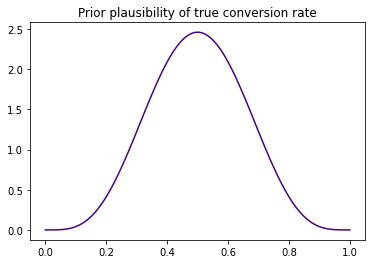

In [23]:
fig, ax = plt.subplots()
possible_p_values = np.linspace(0,1,100)

beta = stats.beta(5,5)
prior = beta.pdf(possible_p_values)
ax.plot(possible_p_values, prior, c="indigo")
ax.set_title("Prior plausibility of true conversion rate");

## The Data
This is fixed, we don't choose data, we just observe it.

Let's say we observed 9 conversions and 1 non conversion

In [24]:
obs = np.array([1., 1., 1., 1., 1., 1., 1., 1., 1., 0.])

## Our likelihood (and model)
Now we're ready to calculate likelihood. 

For each possible p value we calculate the relative likelihood that the data could have been produced with that p value

In [25]:
possible_p_values = np.linspace(0,1,100)
likelihood = stats.binom(p=possible_p_values, n=obs.shape[0]).pmf(obs.sum())

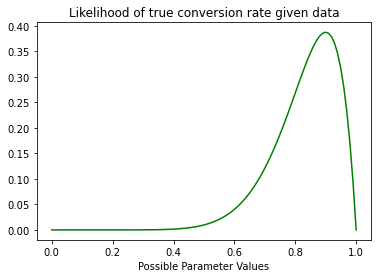

In [26]:
fig, ax = plt.subplots()

ax.plot(possible_p_values,likelihood, c="g")
ax.set_title("Likelihood of true conversion rate given data")
ax.set_xlabel("Possible Parameter Values");

# To get a posterior all we need to do is multiply!
Per the definition of Bayes formula thats all there is to it.

With our prior and likelihood values calculated all we need to do now is multiply across!

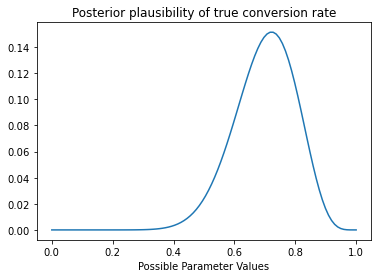

In [27]:
fig, ax = plt.subplots()

posterior = prior * likelihood

ax.plot(possible_p_values, posterior)
ax.set_title("Posterior plausibility of true conversion rate")
ax.set_xlabel("Possible Parameter Values");

# 🔑  The *Bayesian update* process
Compare the three distributions together. Specifically how we 

1. Start a (justified) prior
2. Calculate the likelihood using observed data and model
3. Use both to estimate a posterior


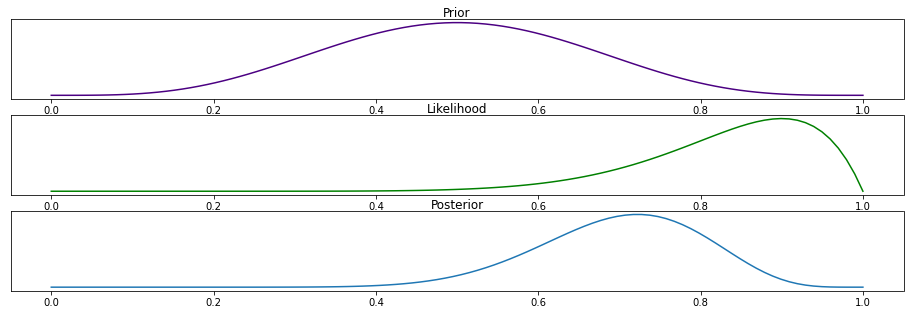

In [28]:
fig, axes = plt.subplots(3,1, figsize=(16,5))

ax = axes[0]
prior = beta.pdf(possible_p_values)
ax.plot(possible_p_values, prior, c="indigo")
ax.set_title("Prior", y=.95)
ax.set_yticks([]);

ax = axes[1]
ax.plot(possible_p_values,likelihood, c="g")
ax.set_title("Likelihood", y=.95)
# ax.set_ylabel("Relative Likelihood of parameter value given data")
ax.set_xlabel("Possible Parameter Values");
ax.set_yticks([])

ax = axes[2]
ax.plot(possible_p_values, posterior)
ax.set_title("Posterior", y=.95)
# ax.set_ylabel("Relative Likelihood of parameter value given data")
ax.set_yticks([]);

# 🙌 Change the prior and data and see the effects
Download this notebook and change the prior and data and see what happens. Try using
* A wide prior
* More observations
* Less observations
* Different level of conversions

# 🤔 Calculating the posterior distribution is easy! What do we need PPLs for?
In this simple case, called a beta binomial model, the posterior is straightforward. There's actually an even easier way than we showed

But once we get to more complex models that include many parameters these simple methods stop working

Think of of it like a bicycle, with small short distances and light load a simple bike works just fine. But once you need to go a long distance or carry a heavy load a car is better. Same idea here.

#  MCMC for posterior estimation
In the rest of this course we'll use a sampling based method called Markov Chain Monte Carlo

MCMC is a method that has gained a lot of momentum in the last decade because it 
* Works well on many models relatively automatically
* Is efficient and returns results relatively quickly
* Comes with a good set of diagnostics to guide you

A big job of modern PPLs is to serve as an interface to methods such as MCMC

This will be covered in future lessons.

# Section Recap
* Posterior distributions 
    * allow us to perform *inference* the goal of statistics
    * incorporate the data, the model, and our priors
* Bayesian updating is the process of combining prior, likelihood, data
* Posterior estimation is not always "easy or straightforward"
    * PPLs typically estimate the posterior with a sampling technique called MCMC 